In [196]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sn
import matplotlib.pyplot as plt
KAG = pd.read_csv('KAG_conversion_data.csv')


# Exploração dos Dados (pré-tratamento)


Façamos primeiramente uma exploração simples dos dados, que será aprofundada durante o tratamento

In [197]:
KAG.fb_campaign_id.nunique()

691

In [198]:
KAG

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [199]:
KAG.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


## Geral

<Axes: xlabel='Spent'>

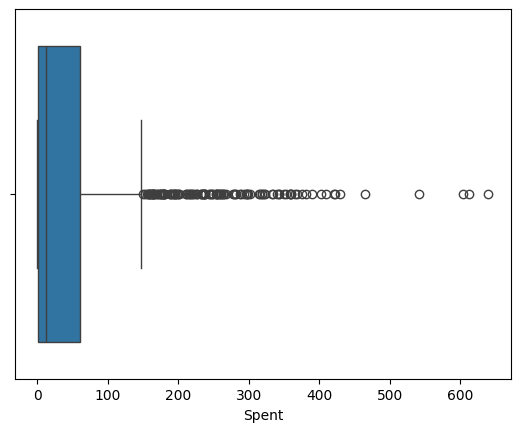

In [200]:
sn.boxplot(x = KAG['Spent'])

<Axes: xlabel='Clicks'>

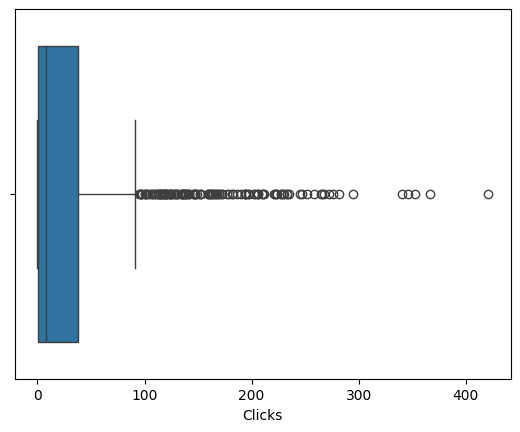

In [201]:
sn.boxplot(x = KAG['Clicks'])

<Axes: xlabel='interest'>

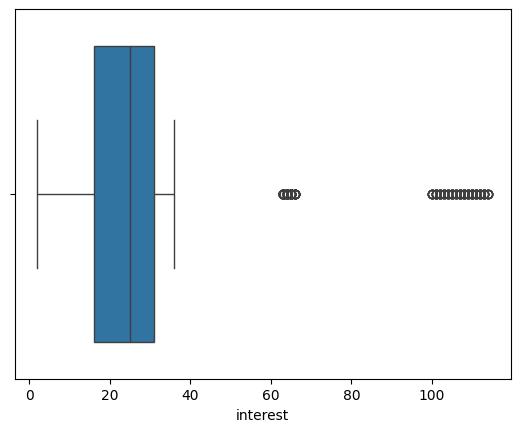

In [202]:
sn.boxplot(x = KAG['interest'])

<Axes: xlabel='Impressions'>

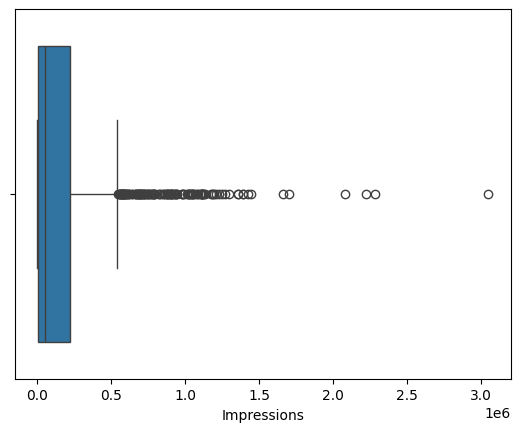

In [203]:
sn.boxplot(x = KAG['Impressions'])

## Observando relação entre os dados

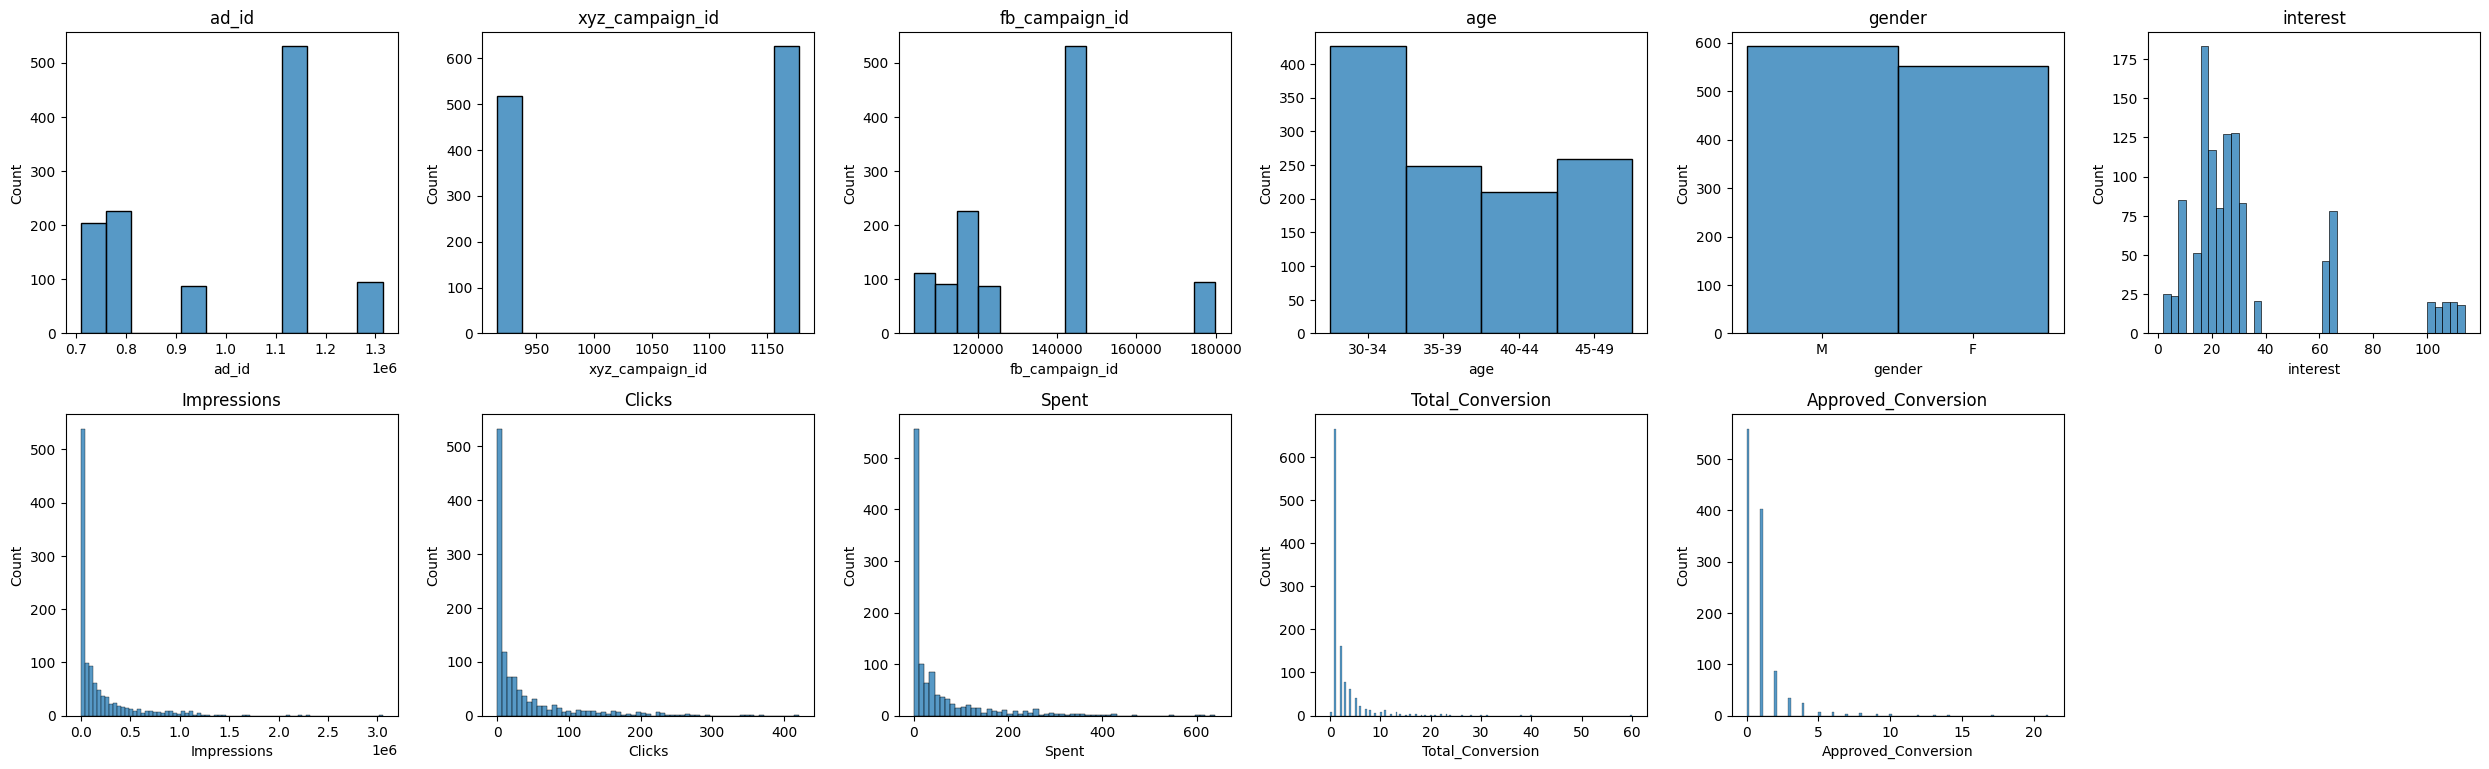

In [204]:
plt.figure(figsize= (25,15))
for i, column in enumerate(KAG.columns):
  plt.subplot(4, 6, i +1)
  sn.histplot(data=KAG[column])
  plt.title(column)
plt.tight_layout()
plt.show()

In [205]:
KAG.corr()

<ipython-input-205-0a53cd9edf62>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


<ipython-input-206-28ff8fae0759>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



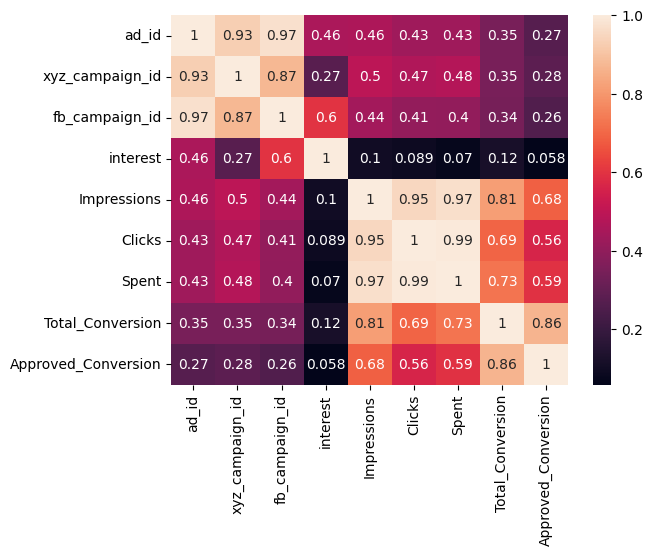

In [206]:
corr_matrix = KAG.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [207]:
grouped=KAG.groupby(by='Approved_Conversion').mean()
grouped

<ipython-input-207-77286ef867ec>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion
Approved_Conversion,,,,,,,,
0,9.420920e+05,1037.527728,129258.642218,30.740608,8.827699e+04,17.588551,26.394311,1.375671
1,9.814065e+05,1065.116625,133139.990074,33.099256,1.314142e+05,23.665012,36.400720,1.992556
2,1.126285e+06,1152.674419,147679.802326,38.151163,4.281377e+05,75.825581,116.480930,5.255814
3,1.132617e+06,1171.085714,147636.885714,32.714286,5.233266e+05,92.171429,141.145714,7.457143
4,1.177889e+06,1178.000000,154934.291667,49.833333,6.537148e+05,119.125000,180.752917,9.333333
5,1.176715e+06,1178.000000,154722.857143,44.428571,7.430376e+05,132.285714,197.465713,14.142857
6,1.121760e+06,1178.000000,144650.142857,25.000000,8.853706e+05,132.571429,214.481428,14.000000
7,1.169588e+06,1178.000000,153418.500000,42.250000,1.394067e+06,217.500000,367.265001,22.000000
8,1.121559e+06,1178.000000,144616.200000,24.400000,1.133066e+06,187.400000,306.519999,17.600000


As informações de ID não são relevantes.

Como também evidenciaremos posteriormente com os gráficos de distribuição, não existe correlação entre o número de conversões aprovadas e o número de clicks, impressões ou interesse, nem entre interesse e clicks.

In [208]:
grouped=KAG.groupby(by='gender').mean()
grouped

<ipython-input-208-fef7901918e5>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
gender,,,,,,,,,
F,975538.355717,1056.529946,132976.085299,34.085299,208462.517241,43.335753,62.618185,2.983666,0.898367
M,998172.023649,1077.483108,134535.940878,31.538851,166506.724662,24.133446,40.882787,2.736486,0.986486


Daqui podemos extrair informações que possam ser relevantes, observamos que clientes do genero feminino geraram me média rasoavelmente menos interesse comparado aos do genero masculino, mas clicaram e gastaram cerca de duas vezes mais e tambem demonstraram cerca de duas vezes o interesse.

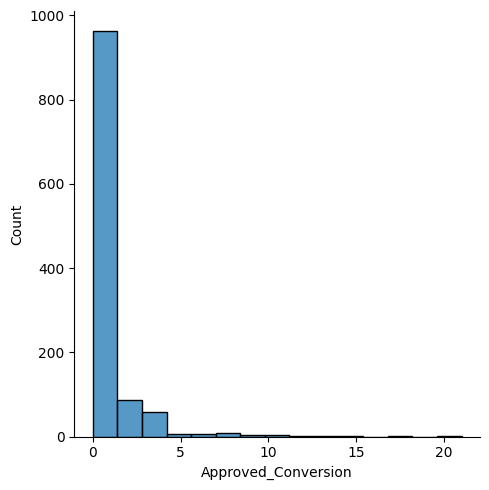

In [209]:
sn.displot(KAG['Approved_Conversion'], bins = 15, kde = False);

Observamos que não houve conversão na maior parte das tentativas de vendas (conversões totais), isso pode causar um problema de desbalanceamento quando aplicado a um modelo de aprendizagem de máquina.

### Scatters Gerais

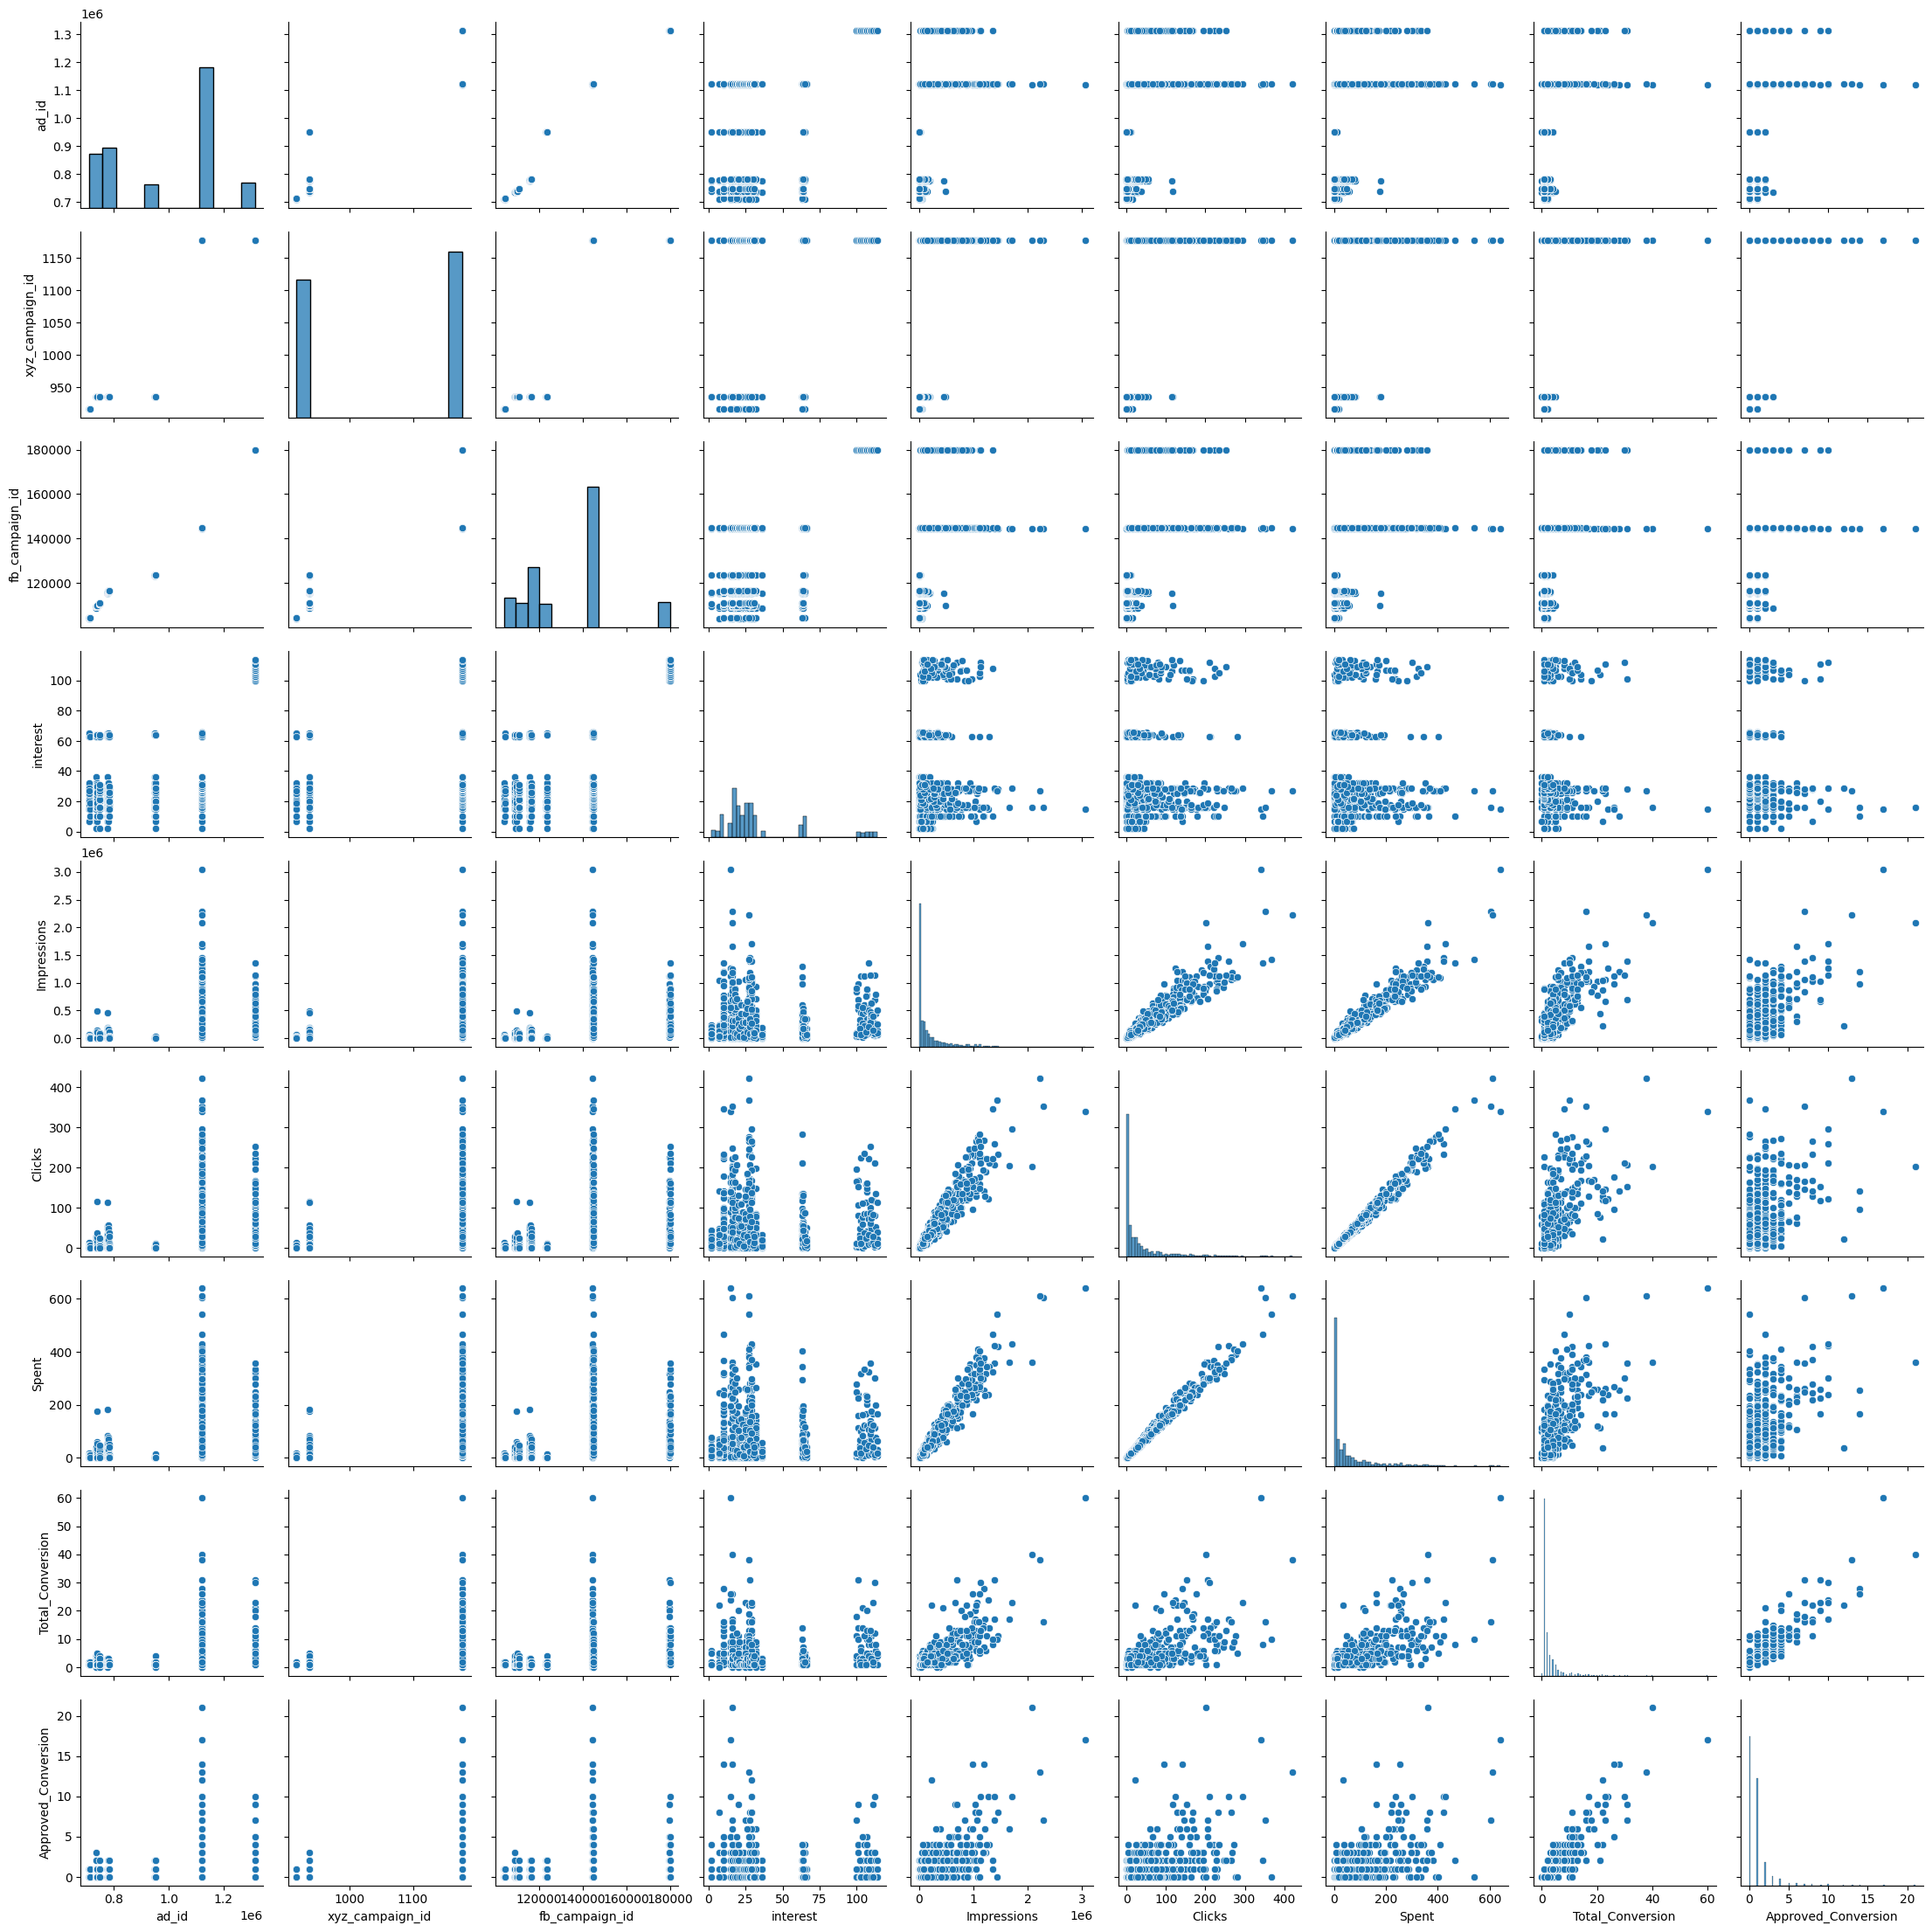

In [210]:
sn.pairplot(KAG)

Aqui podemos observar as correlações entre as features.

### Explorando mínimos e máximos das campanhas

In [211]:
#Obtemos o valor médio da aprovação total para cada campanha FB, em seguida observamos o valor máximo e mínimo
media_fb_campaign = (KAG.groupby('fb_campaign_id').mean(numeric_only = True)['Total_Conversion']).sort_values()
media_fb_campaign

fb_campaign_id
108792     0.00
110962     0.00
144720     0.50
115510     0.75
116331     1.00
          ...  
179930    20.00
179927    21.00
179934    23.00
179965    30.00
179954    31.00
Name: Total_Conversion, Length: 691, dtype: float64

In [212]:
max_fb_campaign = (KAG.groupby('fb_campaign_id').max(numeric_only = True)['Total_Conversion']).sort_values()
max_fb_campaign

fb_campaign_id
110962     0
108792     0
116279     1
116277     1
116267     1
          ..
179954    31
144552    31
144659    38
144533    40
144532    60
Name: Total_Conversion, Length: 691, dtype: int64

In [213]:
min_fb_campaign = (KAG.groupby('fb_campaign_id').min(numeric_only = True)['Total_Conversion']).sort_values()
min_fb_campaign

fb_campaign_id
144582     0
144714     0
110962     0
108792     0
123736     0
          ..
179930    20
179927    21
179934    23
179965    30
179954    31
Name: Total_Conversion, Length: 691, dtype: int64

# Verificação e Tratamento de erros


## Identificando e tratando duplicatas:

In [214]:
KAG[KAG.duplicated(['ad_id'])].shape[0]

0

Aparentemente não temos duplicatas, mas exploremos mais a fundo:

In [215]:
Duplicated_mess = pd.DataFrame()

In [216]:
#Duplicated_mess = KAG[['fb_campaign_id', 'age','gender','interest']].copy();
#Duplicated_mess = Duplicated_mess[Duplicated_mess.duplicated()]
#Duplicated_mess.sort_values(by=['interest'])
#452 rows

In [217]:
Duplicated_mess = KAG[KAG.duplicated(subset=['fb_campaign_id','age','gender','interest'], keep=False)]
Duplicated_mess.sort_values(by=['interest'])
#680 rows

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
894,1121873,1178,144669,30-34,F,2,5264,0,0.000000,1,0
895,1121874,1178,144669,30-34,F,2,145548,28,42.370000,2,1
753,1121575,1178,144619,40-44,M,2,128595,23,36.480001,1,1
752,1121572,1178,144619,40-44,M,2,32574,5,7.480000,1,0
693,1121425,1178,144594,35-39,M,2,85970,14,24.780000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,1178,144621,40-44,M,66,9773,1,1.460000,1,0
618,1121286,1178,144571,30-34,M,66,10991,0,0.000000,1,0
617,1121285,1178,144571,30-34,M,66,37187,4,6.370000,1,0
616,1121284,1178,144571,30-34,M,66,175631,23,40.760000,1,0


In [218]:
KAG = KAG.drop(Duplicated_mess.index, errors='ignore', axis=0)

In [219]:
Duplicated_mess["Impressions"] = Duplicated_mess["Impressions"].astype(int)
Duplicated_mess["Clicks"] = Duplicated_mess["Clicks"].astype(int)
Duplicated_mess["Spent"] = Duplicated_mess["Spent"].astype(int)
Duplicated_mess["Total_Conversion"] = Duplicated_mess["Total_Conversion"].astype(int)
Duplicated_mess["Approved_Conversion"] = Duplicated_mess["Approved_Conversion"].astype(int)

In [220]:
figura = px.scatter(Duplicated_mess, x=Duplicated_mess.Impressions, y=Duplicated_mess.ad_id)
figura.show()

Verificamos aqui alguns padrões entre os *ad_ids* em 3 grupos, que são relacionaos ao *xyz_campaign_id*.

Não Possuímos uma coluna ***tempo*** para intuir qual o valor mais atualizado, poderiamos assumir que a coluna *ad_ids*, estando em ordem crescente, apresenta uma ordem cronológica da adição dos valores, ou simplesmente utilizar as rows com o maior valor valor de *Impressions*, assumindo que este seja o correto e portanto o mais atualizado, mas primeiro vamos determinar se os valores de fato seguem uma taxa de crescimento crível verificando alguns casos.

Decidimos então deletar os valores repetidos tomando o valor com o maior número de impressions

```
 'Impressions'
```

e em seguida tratamos e adicionamos os valores sem duplicatas ao nosso DataFrame original.

In [221]:
Duplicated_mess = Duplicated_mess.sort_values('Impressions', ascending=False).drop_duplicates(['fb_campaign_id', 'xyz_campaign_id','interest']).sort_index()

In [222]:
Duplicated_mess.sort_values(by=['interest'])

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
611,1121276,1178,144569,30-34,M,2,240123,38,65,5,4
895,1121874,1178,144669,30-34,F,2,145548,28,42,2,1
751,1121571,1178,144619,40-44,M,2,212496,44,74,2,1
690,1121421,1178,144594,35-39,M,2,233404,43,70,2,1
613,1121278,1178,144570,30-34,M,7,1044442,142,245,22,8
...,...,...,...,...,...,...,...,...,...,...,...
891,1121867,1178,144668,30-34,F,65,82640,16,23,1,1
987,1122166,1178,144718,40-44,F,65,118451,28,38,4,1
755,1121584,1178,144621,40-44,M,66,33154,5,7,1,1
619,1121287,1178,144571,30-34,M,66,344618,51,89,3,1


In [223]:
Duplicated_mess[Duplicated_mess.duplicated(['fb_campaign_id','xyz_campaign_id','age','gender','interest'])]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion


Agora com uma tabela tratada com valores únicos, tendo dropado **TODOS** os valores repetidos na nossa tabela *KAG* original, iremos somar à tabela *Duplicated_mess* agora com valores únicos. Faremos isso concatenando os dataframes.

In [224]:
Frames = [Duplicated_mess,KAG]
KAG = pd.concat(Frames)

## Erros

In [225]:
#Função para verificar a existência de Nulos.
contain_nulls = KAG[
    KAG.ad_id.isna() | KAG.xyz_campaign_id.isna() | KAG.fb_campaign_id.isna()
    | KAG.interest.isna() | KAG.Impressions.isna() | KAG.Clicks.isna()
    | KAG.Spent.isna() | KAG.Total_Conversion.isna() | KAG.Approved_Conversion.isna()
]
contain_nulls.shape[0]

0

Verificamos por essa função que não existem nulos ou infinitos, mas ainda existem outros erros e inconsistências possíveis nos dados.

No conjunto de células após este tentaremos tratar as duplicadas, mas antes disso é importante estar ciente e tratar a presença de outliers já que, no caso de tentarmos substituir as duplicatas pelo valor mais atualizado não acabarmos por substituí-lo por um outlier que irá afetar a eficácia do modelo.

Planejamos

A seguir verificamos outras possíveis inconsistências

**Número de Conversões aprovadas é superior ao número total de conversões**

In [226]:
KAG[(KAG.Total_Conversion) < (KAG.Approved_Conversion)].shape[0]

0

In [227]:
KAG = KAG.drop(KAG[KAG.Total_Conversion < KAG.Approved_Conversion].index)
KAG[(KAG.Total_Conversion) < (KAG.Approved_Conversion)].shape[0]

0

**Tipos Estranhos:**

In [228]:
KAG.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

As colunas *ad_id*, *xyz_campaign_id* e *fb_campaign_id* já são variáveis do tipo **int64**.

Para que possamos corrigir alguns tipos de erros e futuramente fazer nossa predição precisamos converter as váriaveis categóricas nominais em tipos numéricos.

 Para *age*, dada sua natureza ordinal, usaremos **Label Encoding**
 Para *gender*,dada sua natureza nominal, usaremos **One-Hot encoding**

In [229]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [230]:
KAG.apply(lambda col: col.unique())

ad_id                  [708815, 709040, 709323, 709327, 709756, 71048...
xyz_campaign_id                                         [916, 936, 1178]
fb_campaign_id         [103928, 103965, 104012, 104013, 104085, 10420...
age                                         [30-34, 35-39, 40-44, 45-49]
gender                                                            [M, F]
interest               [28, 16, 15, 10, 36, 18, 27, 64, 29, 65, 63, 3...
Impressions            [4259, 5120, 7132, 12193, 10976, 57665, 13329,...
Clicks                 [1, 0, 2, 14, 4, 7, 13, 5, 36, 116, 8, 10, 25,...
Spent                  [1.0, 0.0, 2.0, 3.0, 18.0, 5.0, 10.0, 20.0, 9....
Total_Conversion       [1, 3, 4, 0, 2, 28, 60, 40, 7, 20, 5, 23, 22, ...
Approved_Conversion    [0, 1, 3, 2, 14, 17, 21, 4, 9, 7, 8, 6, 10, 5,...
dtype: object

In [231]:
KAG['age'] = KAG['age'].map({'30-34':0,'35-39':1,'40-44':2,'45-49':3})

In [232]:
OneHot_Dummy = pd.get_dummies(KAG['gender'])

In [233]:
#KAG['F'] = OneHot_Dummy['F']
#KAG['M'] = OneHot_Dummy['M']

In [234]:
KAG.insert(4, 'M', OneHot_Dummy['M'])
KAG.insert(5, 'F', OneHot_Dummy['F'])

In [235]:
KAG.sample(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,M,F,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
295,777905,936,115762,0,1,0,M,31,3288,0,0.00,1,0
104,735189,936,108818,2,0,1,F,64,9965,3,4.05,1,0
10,708979,916,103955,0,1,0,M,31,1224,0,0.00,1,0
120,737130,936,109507,1,1,0,M,16,11199,2,2.68,1,0
1120,1314391,1178,179958,2,0,1,F,105,228629,38,57.00,2,0
728,1121499,1178,144607,2,1,0,M,25,264222,63,87.79,1,1
738,1121530,1178,144612,2,1,0,M,30,188873,38,58.00,1,1
182,747903,936,110951,0,0,1,F,63,1491,0,0.00,1,1
1110,1314381,1178,179948,1,0,1,F,110,357401,47,68.67,8,1
763,1121598,1178,144623,3,1,0,M,15,506916,89,133.00,2,2


In [236]:
KAG = KAG.drop(['gender'],axis=1)

In [237]:
KAG.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,M,F,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
3,708815,916,103928,0,1,0,28,4259,1,1.0,1,0
13,709040,916,103965,0,1,0,16,5120,0,0.0,1,0
21,709323,916,104012,1,1,0,15,7132,2,2.0,1,0
23,709327,916,104013,1,1,0,16,12193,2,3.0,1,1
28,709756,916,104085,2,1,0,16,10976,2,1.0,1,1
36,710480,916,104205,0,0,1,16,57665,14,18.0,1,1
55,734210,936,108654,0,1,0,10,13329,4,5.0,1,1
62,734314,936,108672,0,1,0,36,962,0,0.0,1,0
79,734796,936,108752,0,0,1,16,39337,7,10.0,1,1
80,734800,936,108753,0,0,1,18,1635,0,0.0,1,0


**Valor gasto é 0**





In [238]:
KAG[(KAG.Spent ==0)].shape[0]

150

De acordo com [este site](https://www.shopify.com/blog/common-facebook-advertising-mistakes) o Facebook não possui opção de anúncio gratuíto, embora existam maneiras de anúnciar um produto gratuítamente na plataforma usando o facebook marketplaces, ainda sim consideraremos isso como um erro.

In [239]:
KAG_spent_errors = KAG[(KAG.Spent == 0)]

In [240]:
KAG_spent_errors['Total_Conversion'].max()

2

In [241]:
KAG_spent_errors['Clicks'].max()

1

Onde o valor gasto é zero a quantidade de clicks também é 0.

 poderiamos considerar para dropar todas essas linhas, prejudicando nosso modelo, mas como sabemos que existe uma relação entre o número de impressões e o número de conversões,e que por sua vez existem relações fortes entre o número de impressões e clicks e impressões e valor gasto podemos **determinar o valor de Clicks e Spent baseado no valor médio em relação a Impressions usando MICE**

In [242]:
KAG['Clicks'] = np.where((KAG['Spent'] == 0) & ((KAG['Clicks'] == 0)), np.nan, KAG['Clicks'])
KAG['Spent'] = np.where((KAG['Spent'] == 0), np.nan, KAG['Spent'])

Para continuarmos usando o DataSet usaremos a abordagem **MICE** usando o IterativeImputer do package **sklearn.impute**

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [244]:
MICE_L_R = LinearRegression()
MICE_I_Imp = IterativeImputer(estimator=MICE_L_R, verbose=0, max_iter=30, tol=10, imputation_order='roman')

In [245]:
MICE_I_Imp.fit(KAG)

IterativeImputer(estimator=LinearRegression(), imputation_order='roman',
                 max_iter=30, tol=10)

In [246]:
 Inputed = MICE_I_Imp.fit_transform(KAG)

In [247]:
KAG.loc[:, KAG.columns] = Inputed


<ipython-input-247-a49ed2acbffb>:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [248]:
KAG.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,M,F,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
3,708815.0,916.0,103928.0,0.0,1.0,0.0,28.0,4259.0,1.000000,1.000000,1.0,0.0
13,709040.0,916.0,103965.0,0.0,1.0,0.0,16.0,5120.0,46.645183,52.534772,1.0,0.0
21,709323.0,916.0,104012.0,1.0,1.0,0.0,15.0,7132.0,2.000000,2.000000,1.0,0.0
23,709327.0,916.0,104013.0,1.0,1.0,0.0,16.0,12193.0,2.000000,3.000000,1.0,1.0
28,709756.0,916.0,104085.0,2.0,1.0,0.0,16.0,10976.0,2.000000,1.000000,1.0,1.0
36,710480.0,916.0,104205.0,0.0,0.0,1.0,16.0,57665.0,14.000000,18.000000,1.0,1.0
55,734210.0,936.0,108654.0,0.0,1.0,0.0,10.0,13329.0,4.000000,5.000000,1.0,1.0
62,734314.0,936.0,108672.0,0.0,1.0,0.0,36.0,962.0,47.703000,52.271246,1.0,0.0
79,734796.0,936.0,108752.0,0.0,0.0,1.0,16.0,39337.0,7.000000,10.000000,1.0,1.0
80,734800.0,936.0,108753.0,0.0,0.0,1.0,18.0,1635.0,52.003754,54.292118,1.0,0.0


In [249]:
KAG.isnull().values.any()

False

**Número de clicks ou Impressões é 0 mas número de conversões totais é maior que 0:**

In [250]:
KAG['Total_Conversion'] = np.where((KAG['Total_Conversion'] > 0) & ((KAG['Clicks'] == 0) | (KAG['Impressions'] ==0)), 0, KAG['Total_Conversion'])

**Número de Conversões é maior que o número de Clicks**
Como as vendas são efetuadas em ambiente online, não podemos ter mais vendas do que temos clicks nos anúncios de vendas.


In [251]:
KAG.shape[0]

691

In [252]:
KAG[(KAG['Approved_Conversion'] > KAG['Clicks'])]


,ad_id,xyz_campaign_id,fb_campaign_id,age,M,F,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
484,951391.0,936.0,123659.0,0.0,0.0,1.0,28.0,2879.0,1.0,1.0,2.0,2.0


In [253]:
KAG = KAG.drop(484)
KAG.shape[0]

690

**Verificando Infinitos:**

In [254]:
KAG[np.isfinite(KAG).all(1)]

,ad_id,xyz_campaign_id,fb_campaign_id,age,M,F,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
3,708815.0,916.0,103928.0,0.0,1.0,0.0,28.0,4259.0,1.000000,1.000000,1.0,0.0
13,709040.0,916.0,103965.0,0.0,1.0,0.0,16.0,5120.0,46.645183,52.534772,1.0,0.0
21,709323.0,916.0,104012.0,1.0,1.0,0.0,15.0,7132.0,2.000000,2.000000,1.0,0.0
23,709327.0,916.0,104013.0,1.0,1.0,0.0,16.0,12193.0,2.000000,3.000000,1.0,1.0
28,709756.0,916.0,104085.0,2.0,1.0,0.0,16.0,10976.0,2.000000,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410.0,1178.0,179977.0,3.0,0.0,1.0,109.0,1129773.0,252.000000,358.189997,13.0,2.0
1139,1314411.0,1178.0,179978.0,3.0,0.0,1.0,110.0,637549.0,120.000000,173.880003,3.0,0.0
1140,1314412.0,1178.0,179979.0,3.0,0.0,1.0,111.0,151531.0,28.000000,40.289999,2.0,0.0
1141,1314414.0,1178.0,179981.0,3.0,0.0,1.0,113.0,790253.0,135.000000,198.710001,8.0,2.0


# Criando nosso Target

###No nosso modelo queremos prever a taxa de conversão baseado nas informações apresentadas na base de dados como varíaveis preditoras. Nosso **target**, baseado nisso, é a **taxa de conversão.**

Segundo a definição encontrada [aqui](https://resultadosdigitais.com.br/marketing/o-que-taxa-de-conversao/) existem três tipos de taxa de conversão:


*   Visitantes para Leads
*  Leads para oportunidades
*  Oportunidades para clientes


> Em **Visitantes para Leads**, seguindo a definição de *Lead* para Marketing ("contatos que você gera através das suas ações de marketing."), consideramos então o número de impressões (*Impressions*) de cada campanha para o número de interações (*Clicks*).

>Em **Leads para oportunidades** consideramos então o número de interações (*Clicks*) para o número de conversões totais (*Total_Conversion*).

>Em **Oportunidades para clientes** consideramos então o número de conversões totais (*Total_Conversion*) para o número de conversões reais (*Approved_Conversion*)

Entretanto, pesquisando em outras fontes( [#1](https://www.optimizely.com/optimization-glossary/conversion-rate/#:~:text=To%20calculate%20a%20conversion%20rate,by%20200%2C%20or%2025%25.), [#2](https://blog.useproof.com/calculate-conversion-rate), [#3](https://www.wallstreetprep.com/knowledge/conversion-rate/)) encontramos definições de **taxa de conversão** como a relação do número de interações (*Clicks*) e o número de conversões reais (*Approved_Conversions*). Faz sentido que existam diferentes tipos de taxa conversão para diferentes tipos de objetivos, mas usaremos esta ultima definição mais geral para definir o nosso **target**.


In [255]:
KAG['Real_Conversion'] = ((KAG['Approved_Conversion'] / KAG['Clicks'])*100)

In [256]:
KAG.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,M,F,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Real_Conversion
3,708815.0,916.0,103928.0,0.0,1.0,0.0,28.0,4259.0,1.000000,1.000000,1.0,0.0,0.000000
13,709040.0,916.0,103965.0,0.0,1.0,0.0,16.0,5120.0,46.645183,52.534772,1.0,0.0,0.000000
21,709323.0,916.0,104012.0,1.0,1.0,0.0,15.0,7132.0,2.000000,2.000000,1.0,0.0,0.000000
23,709327.0,916.0,104013.0,1.0,1.0,0.0,16.0,12193.0,2.000000,3.000000,1.0,1.0,50.000000
28,709756.0,916.0,104085.0,2.0,1.0,0.0,16.0,10976.0,2.000000,1.000000,1.0,1.0,50.000000
36,710480.0,916.0,104205.0,0.0,0.0,1.0,16.0,57665.0,14.000000,18.000000,1.0,1.0,7.142857
55,734210.0,936.0,108654.0,0.0,1.0,0.0,10.0,13329.0,4.000000,5.000000,1.0,1.0,25.000000
62,734314.0,936.0,108672.0,0.0,1.0,0.0,36.0,962.0,47.703000,52.271246,1.0,0.0,0.000000
79,734796.0,936.0,108752.0,0.0,0.0,1.0,16.0,39337.0,7.000000,10.000000,1.0,1.0,14.285714
80,734800.0,936.0,108753.0,0.0,0.0,1.0,18.0,1635.0,52.003754,54.292118,1.0,0.0,0.000000


In [257]:
KAG.describe()


,ad_id,xyz_campaign_id,fb_campaign_id,age,M,F,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Real_Conversion
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000
mean,9.479162e+05,1031.788406,131119.202899,1.311594,0.484058,0.515942,37.614493,1.851641e+05,44.424010,62.704688,2.988406,0.975362,10.006532
std,2.132213e+05,119.929764,23957.859563,1.169277,0.500108,0.500108,31.500442,3.488903e+05,60.110495,91.962240,5.189571,1.906593,23.919620
min,7.087460e+05,916.000000,103916.000000,0.000000,0.000000,0.000000,2.000000,8.700000e+01,1.000000,-1.670345,0.000000,0.000000,0.000000
25%,7.483208e+05,936.000000,111021.000000,0.000000,0.000000,0.000000,16.000000,3.761750e+03,4.000000,4.865000,1.000000,0.000000,0.000000
50%,7.828390e+05,936.000000,116619.000000,1.000000,0.000000,1.000000,26.000000,2.016350e+04,28.000000,40.550000,1.000000,1.000000,0.441607
75%,1.121789e+06,1178.000000,144654.750000,2.000000,1.000000,1.000000,36.000000,1.946175e+05,52.002815,57.992077,2.000000,1.000000,4.423370
max,1.314415e+06,1178.000000,179982.000000,3.000000,1.000000,1.000000,114.000000,3.052003e+06,421.000000,639.000000,60.000000,21.000000,100.000000


In [258]:
KAG[KAG.Real_Conversion <= 1].shape[0]

362

###Feito isso temos um problema do tipo **regressão** onde usaremos uma abordagem supervisionada, pois estamos tentando prever a taxa de conversão baseado nas taxas de conversão conhecidas.
 Poderiamos converter para um problema do tipo **classificação** onde tentaríamos prever se, baseada nas informações da tabela, haverá conversão ou não, ou seja classificar como conversão existente ou conversão nula. Mas isso já não seria uma **taxa** de conversão.


In [259]:
### **Mas**, seguindo essa última lógica, poderiamos também construir um modelo de **Regressão Lógica** onde o output será a porcentagem predita de **taxa de conversão**


# Transformando os dados

Analisando outliers em geral:

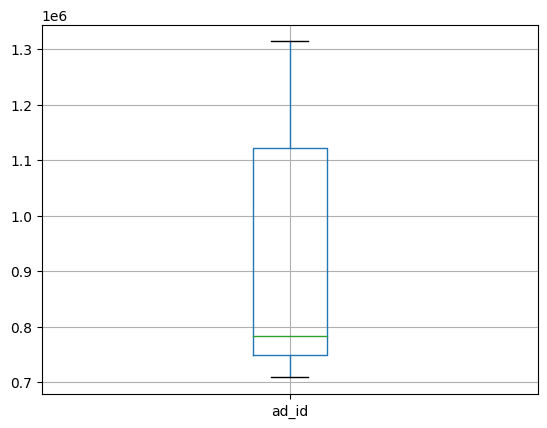

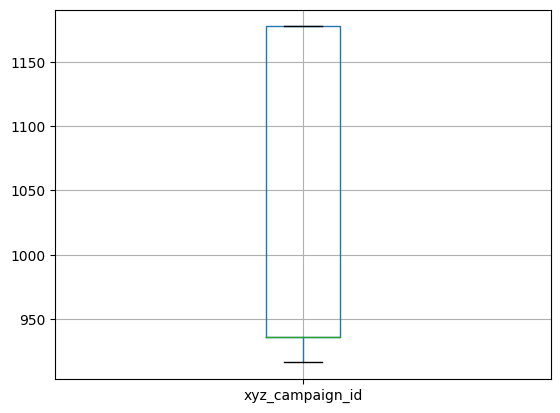

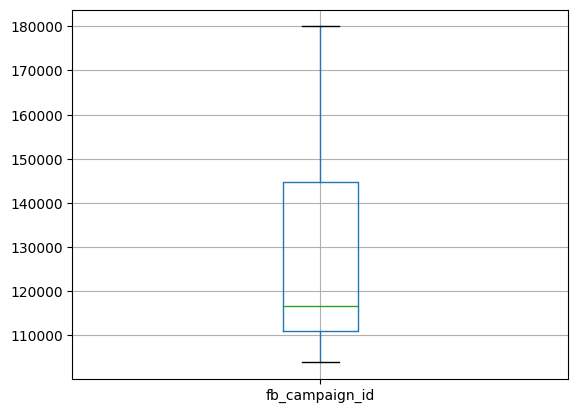

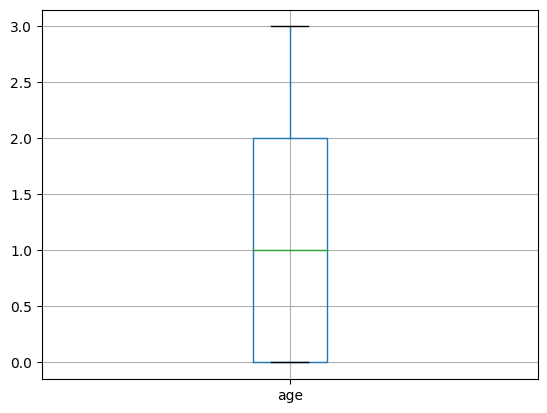

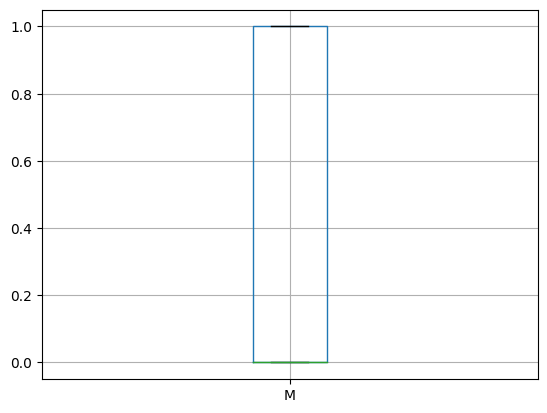

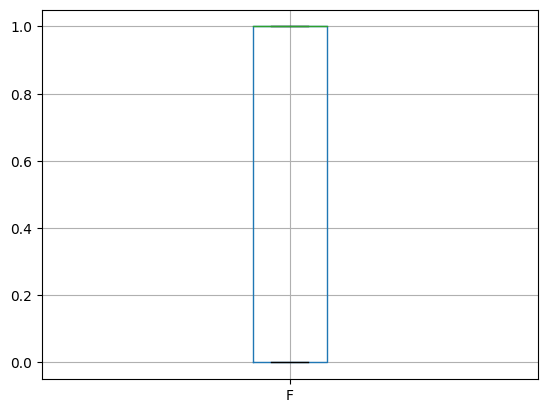

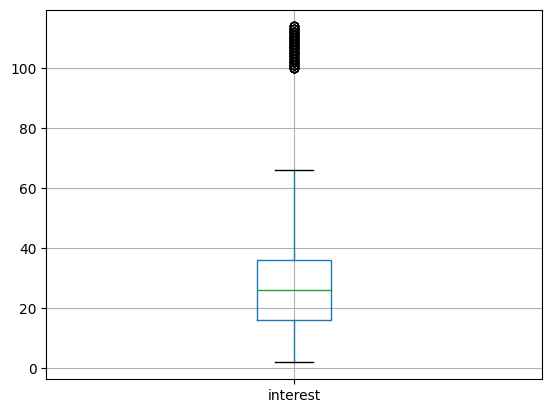

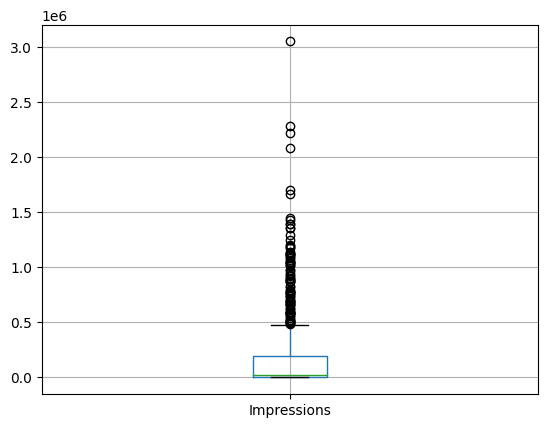

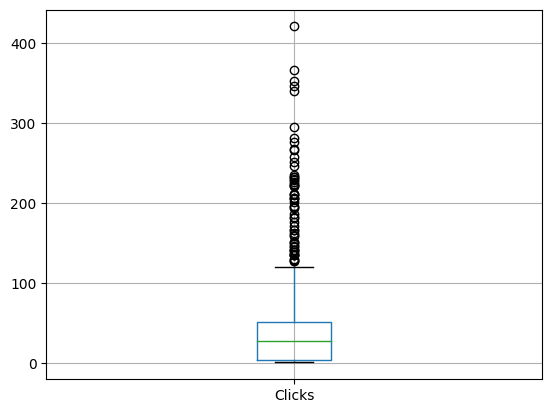

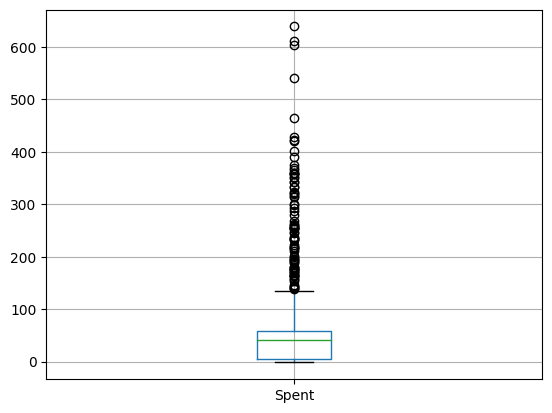

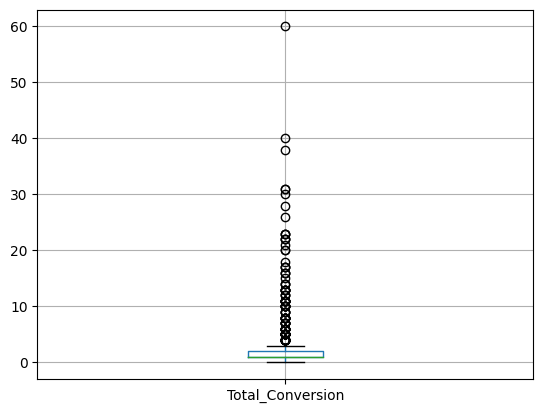

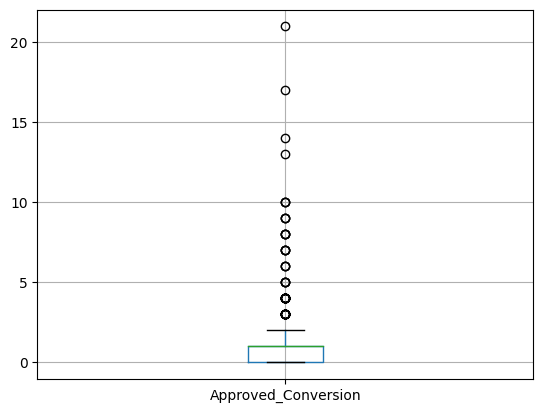

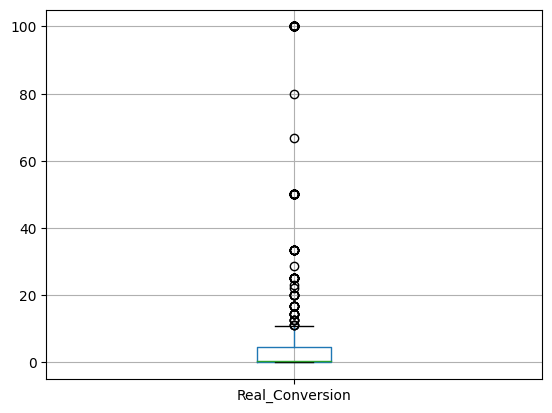

In [260]:
for column in KAG:
    plt.figure()
    KAG.boxplot([column])

**Impressions:**

<Axes: xlabel='Impressions'>

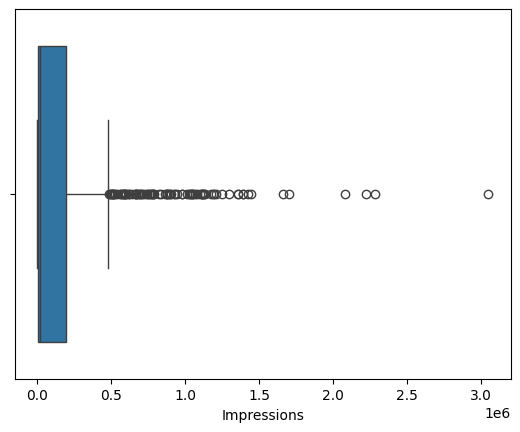

In [261]:
sn.boxplot(x = KAG['Impressions'])

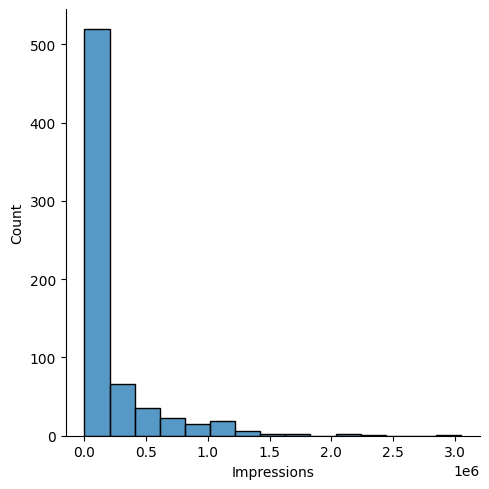

In [262]:
sn.displot(KAG['Impressions'], bins = 15, kde = False);

Identificamos atravez de gráficos bloxpot as colunas que precisam de normalização pela quantidade de *outliers*. Numa distribuição de *outliers* como a da coluna *Impressions* essa seria imprudente usar *winsorização* ou simplesmente deletar os *outliers*, o gráfico não se aplica numa distribuição normal, mas o número de valores mostra que esse não é um simples erro. Esses valores são parte dos dados.

Usaremos tranformação logarítmica

In [263]:
KAG_Impressions_log = np.log(KAG['Impressions'])

<Axes: xlabel='Impressions'>

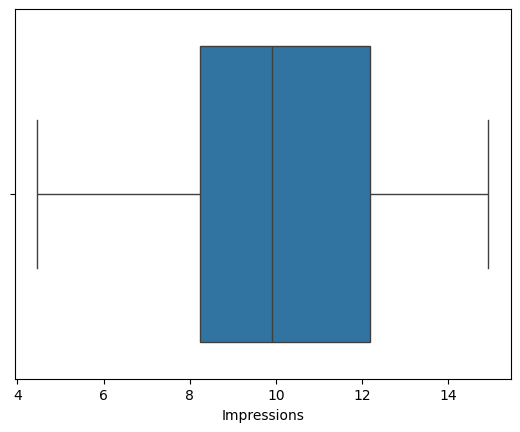

In [264]:
sn.boxplot(x = KAG_Impressions_log)

In [265]:
KAG['Impressions'] = KAG_Impressions_log

**Interest**

  
  
Faremos o mesmo para interest

<Axes: xlabel='interest'>

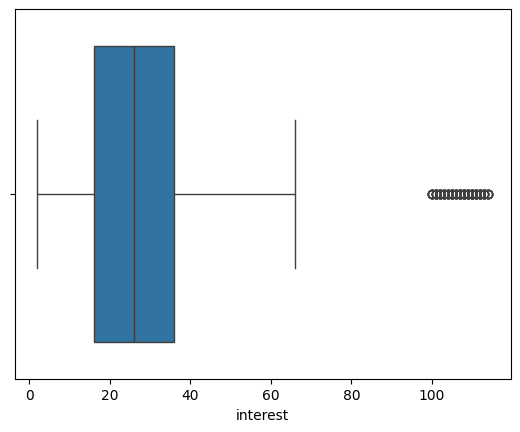

In [266]:
sn.boxplot(x = KAG['interest'])

In [267]:
KAG_Clicks_log = np.log(KAG['interest'])

<Axes: xlabel='interest'>

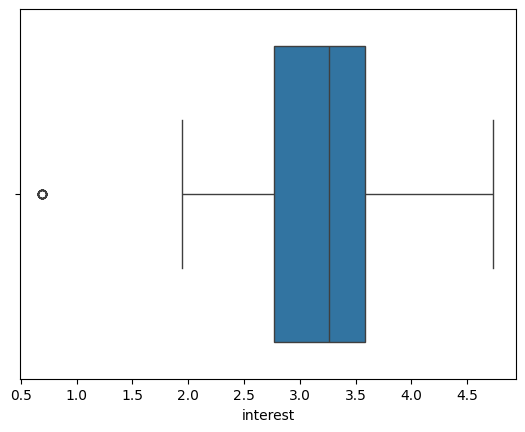

In [268]:
sn.boxplot(x = KAG_Clicks_log)

In [269]:
KAG['interest'] = KAG_Clicks_log

**Clicks**

Faremos o mesmo para clicks

<Axes: xlabel='Clicks'>

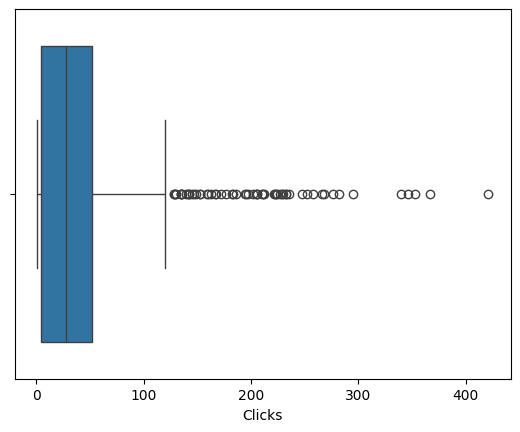

In [270]:
sn.boxplot(x = KAG['Clicks'])

In [271]:
KAG_Clicks_log = np.log(KAG['Clicks'])

<Axes: xlabel='Clicks'>

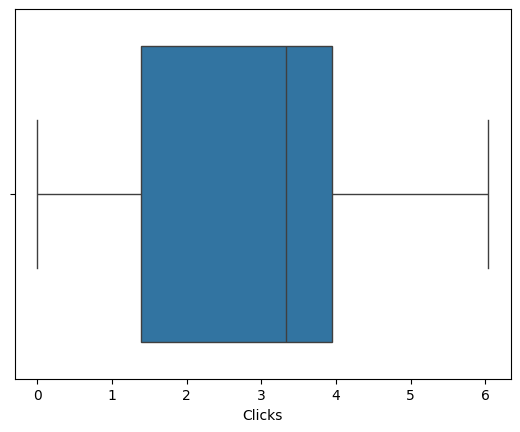

In [272]:
sn.boxplot(x = KAG_Clicks_log)

In [273]:
KAG['Clicks'] = KAG_Clicks_log

**Demais Variáveis**

Não realmente precisamos converter estas, nossas conversões são parte de nosso target e spent é uma informação meta do target, mas o faremos mesmo assim.

Target:

In [274]:
import plotly.figure_factory as ff
labels = ['Distribuição da taxa de conversão real (Conversion Rate)']
figura = ff.create_distplot([KAG.Real_Conversion],labels,bin_size=0.2)
figura.show()

<Axes: xlabel='Real_Conversion'>

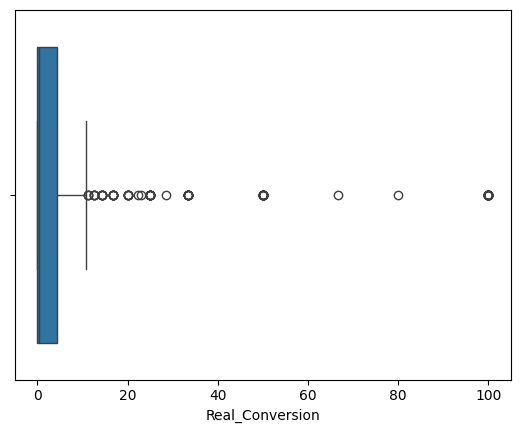

In [275]:
sn.boxplot(x = KAG.Real_Conversion)

Sabendo que temos muitos dados iguais a 0 não podemos usar transformação logarítmica ou transformação recíproca pois encontraremos problemas causados por divisão por 0, por isso usaremos Square Root transformation

In [276]:
#consertar
Sqrt_Fix = KAG["Real_Conversion"].map(lambda i: np.sqrt(i))

<Axes: xlabel='Real_Conversion'>

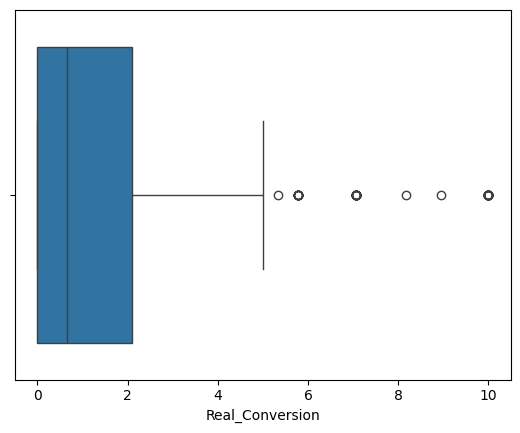

In [277]:
KAG['Real_Conversion'] = Sqrt_Fix
sn.boxplot(x = KAG.Real_Conversion)

Ainda possuímos certo grau de assimetria, mas conseguimos diminui-lo significativamente.

Faremos o mesmo para variáveis com o mesmo problema:

<Axes: xlabel='Spent'>

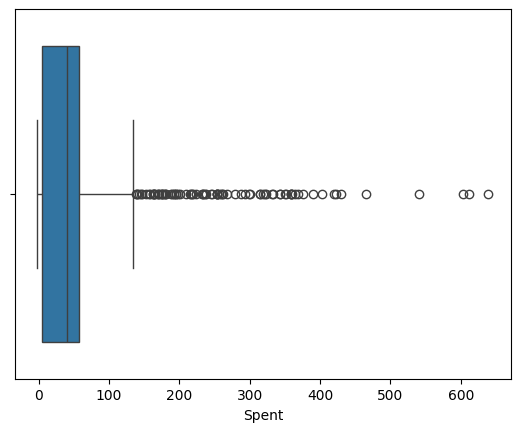

In [278]:
sn.boxplot(x = KAG['Spent'])

In [279]:
Sqrt_Fix = KAG["Spent"].map(lambda i: np.sqrt(i))

<ipython-input-279-b86369378908>:1: RuntimeWarning:

invalid value encountered in sqrt



<Axes: xlabel='Real_Conversion'>

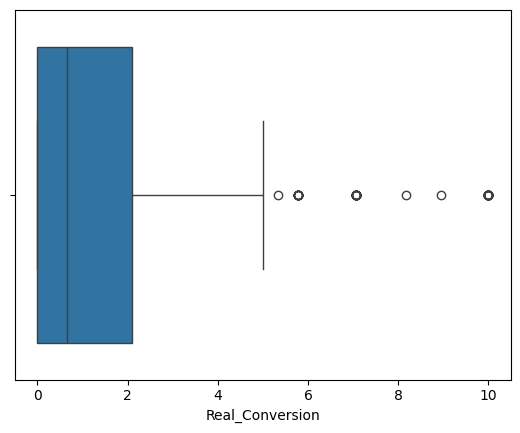

In [280]:
KAG['Spent'] = Sqrt_Fix
sn.boxplot(x = KAG.Real_Conversion)

<Axes: xlabel='Total_Conversion'>

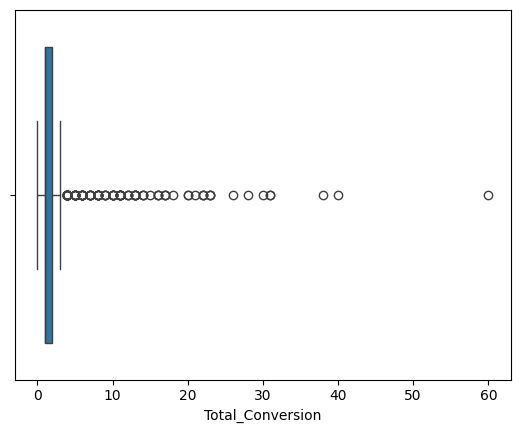

In [281]:
sn.boxplot(x = KAG['Total_Conversion'])

In [282]:
Sqrt_Fix = KAG["Total_Conversion"].map(lambda i: np.sqrt(i))

<Axes: xlabel='Real_Conversion'>

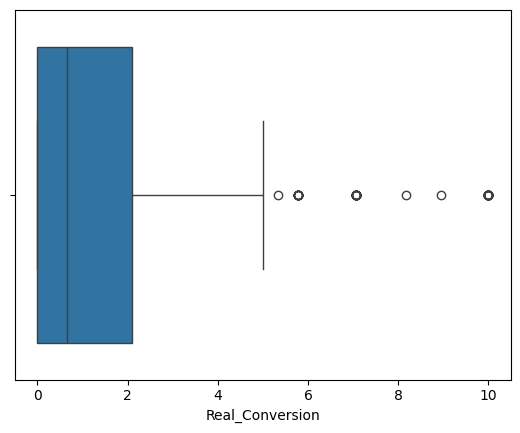

In [283]:
KAG['Total_Conversion'] = Sqrt_Fix
sn.boxplot(x = KAG.Real_Conversion)

<Axes: xlabel='Approved_Conversion'>

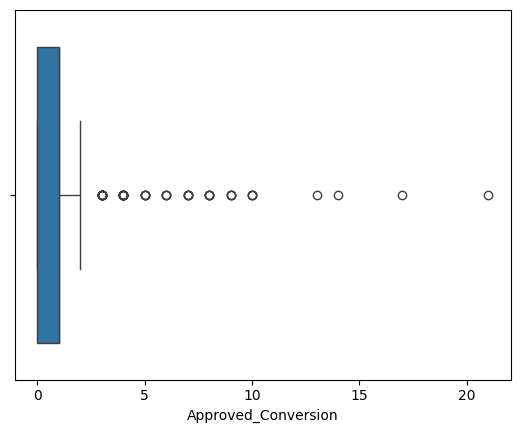

In [284]:
sn.boxplot(x = KAG['Approved_Conversion'])

In [285]:
Sqrt_Fix = KAG["Approved_Conversion"].map(lambda i: np.sqrt(i))

<Axes: xlabel='Real_Conversion'>

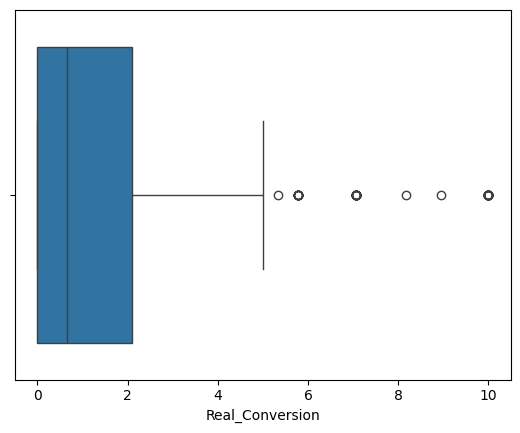

In [286]:
KAG['Approved_Conversion'] = Sqrt_Fix
sn.boxplot(x = KAG.Real_Conversion)

# Separando os Dados


Verificamos as variáveis por colinearidade.

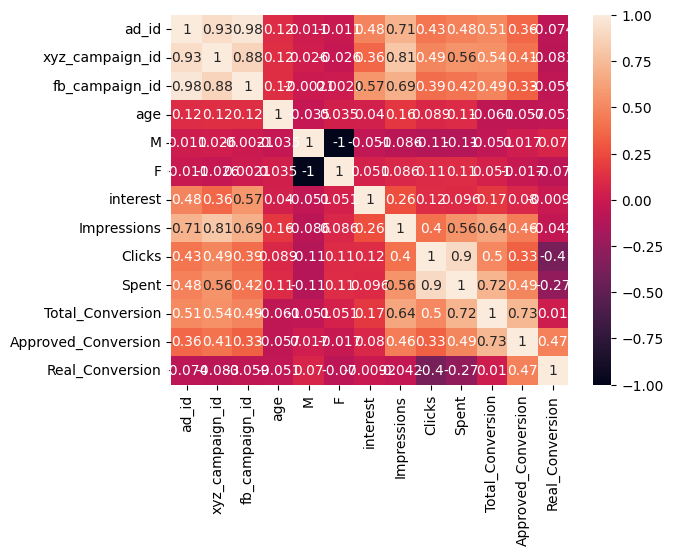

In [287]:
corr_matrix = KAG.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Então separamos as variáveis alvo e preditores;


Nosso objetivo é, dado as informações determinar a efetividade das campanhas publicitárias tanto em atrair clientes quanto em valores gastos pelos clientes, isto é encontrar a taxa de converção.

In [288]:
#target
y = KAG['Real_Conversion']

In [289]:
y.max()

10.0

Verificamos que tratamos de um problema de regressão.

In [290]:
#remove index, colineares, alvo e categorias
x = KAG.drop(['ad_id','xyz_campaign_id','fb_campaign_id','Clicks','Total_Conversion','Approved_Conversion','Real_Conversion'], axis=1)

In [291]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [292]:
xtest.head()

,age,M,F,interest,Impressions,Spent
76,3.0,1.0,0.0,3.433987,6.732211,7.488628
440,2.0,1.0,0.0,2.995732,7.769379,1.685230
43,0.0,0.0,1.0,3.367296,10.008793,3.070831
142,2.0,0.0,1.0,3.044522,6.295266,7.529225
120,1.0,1.0,0.0,2.772589,9.323580,1.637071
